/Users/mukitalam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mukitalam/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


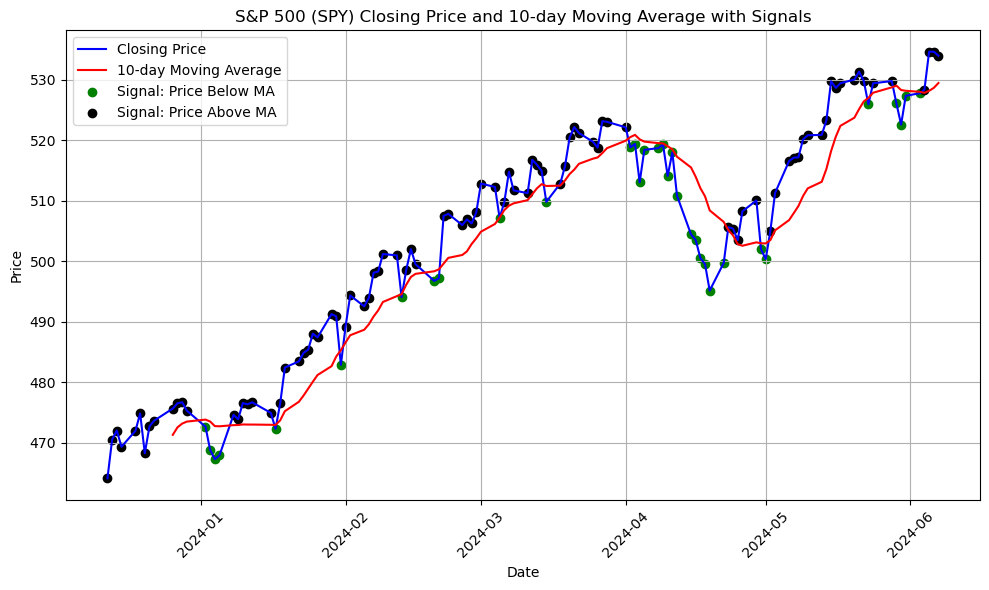

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-12-12 to 2024-06-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            123 non-null    datetime64[ns]
 1   Close_Price     123 non-null    float64       
 2   Moving_Average  114 non-null    float64       
 3   Daily_Std       114 non-null    float64       
 4   Signal          123 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 5.8 KB
None

DataFrame Snippet:
                 Date  Close_Price  Moving_Average  Daily_Std  Signal
Date                                                                 
2023-12-12 2023-12-12   464.100006             NaN        NaN       0
2023-12-13 2023-12-13   470.500000             NaN        NaN       0
2023-12-14 2023-12-14   472.010010             NaN        NaN       0
2023-12-15 2023-12-15   469.329987             NaN

In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

def get_spy_data():
    # Define start and end dates
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=6*30)).strftime('%Y-%m-%d')

    # Fetch data for SPY ticker
    spy_data = yf.download('SPY', start=start_date, end=end_date)
    
    # Drop rows with NA values
    spy_data = spy_data.dropna()

    return spy_data

def calculate_moving_average(data, window=10):
    # Calculate the moving average
    data['Moving_Average'] = data['Close'].rolling(window=window).mean()
    return data

def generate_signal(data):
    # Generate signal based on price vs moving average
    data['Signal'] = (data['Close'] < data['Moving_Average']).astype(int)
    return data

def calculate_standard_deviation(data, window=10):
    # Calculate the standard deviation
    data['Daily_Std'] = data['Close'].rolling(window=window).std()
    return data


if __name__ == "__main__":
    # Fetch SPY data
    spy_data = get_spy_data()
    
    # Calculate 10-day moving average
    spy_data = calculate_moving_average(spy_data)
    
    # Calculate daily standard deviation (10-day window)
    spy_data = calculate_standard_deviation(spy_data)


    # Generate signal column
    spy_data = generate_signal(spy_data)

    # Create DataFrame with desired columns
    spy_df = pd.DataFrame({
        'Date': spy_data.index,
        'Close_Price': spy_data['Close'],
        'Moving_Average': spy_data['Moving_Average'],
        'Daily_Std': spy_data['Daily_Std'],
        'Signal': spy_data['Signal']
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(spy_df['Date'], spy_df['Close_Price'], label='Closing Price', color='blue')
    plt.plot(spy_df['Date'], spy_df['Moving_Average'], label='10-day Moving Average', color='red')

    # Plotting signal points
    plt.scatter(spy_df[spy_df['Signal'] == 1]['Date'], 
                spy_df[spy_df['Signal'] == 1]['Close_Price'], 
                color='green', label='Signal: Price Below MA')

    plt.scatter(spy_df[spy_df['Signal'] == 0]['Date'], 
                spy_df[spy_df['Signal'] == 0]['Close_Price'], 
                color='black', label='Signal: Price Above MA')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('S&P 500 (SPY) Closing Price and 10-day Moving Average with Signals')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print DataFrame summary
    print("DataFrame Summary:")
    print(spy_df.info())

    # Print snippet of the DataFrame
    print("\nDataFrame Snippet:")
    print(spy_df.head())
    print(spy_df.tail())
    print(spy_df.describe())
    
    
    # Save the DataFrame to a CSV file
    file_name = "spy_data.csv"
    spy_df.to_csv(file_name, index=False)
    print(f"DataFrame saved to {file_name}")